In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [40]:
df = pd.read_csv("final.csv")
df

,team,season,points
0,BOS,2013,"[1, 4, 7, 8, 8, 11, 11, 12, 12, 12, 12, 15, 16..."
1,CHI,2013,"[1, 1, 1, 2, 2, 2, 5, 8, 8, 11, 12, 12, 15, 18..."
2,KC,2013,"[1, 4, 7, 7, 10, 10, 10, 13, 16, 16, 19, 20, 2..."
3,NJY,2013,"[3, 6, 6, 7, 10, 13, 16, 19, 22, 22, 25, 26, 2..."
4,POR,2013,"[1, 4, 7, 10, 13, 13, 16, 19, 19, 22, 25, 26, ..."
...,...,...,...
93,ORL,2023,"[0, 0, 0, 0, 3, 6, 7, 10, 10, 10, 13, 14, 15, ..."
94,POR,2023,"[3, 6, 7, 10, 11, 12, 12, 15, 16, 19, 19, 20, ..."
95,RGN,2023,"[0, 3, 6, 9, 10, 13, 13, 13, 16, 16, 19, 20, 2..."
96,SD,2023,"[3, 6, 6, 9, 9, 9, 12, 15, 16, 19, 20, 21, 22,..."


In [41]:
results = pd.DataFrame([], columns=["season", "best", "worst"])
for season in df["season"].unique():
    best = 0
    worst = 1
    data = df[df["season"] == season]
    for team in data["team"].unique():
        points = list(
            map(int, data[data["team"] == team]["points"].iloc[0][1:-1].split(", "))
        )
         
        halfway = points[int(len(points)/2) -1] / (3 * len(points) / 2)
        if halfway > best:
            best = halfway
        if halfway < worst:
            worst = halfway
     
    results.loc[len(results.index)] = [season, best, worst] 
    
results["season"] = results["season"].astype(int)
results

,season,best,worst
0,2013,0.757576,0.060606
1,2014,0.888889,0.250000
2,2015,0.700000,0.233333
3,2016,0.666667,0.133333
4,2017,0.666667,0.333333
5,2018,0.833333,0.083333
6,2019,0.611111,0.222222
7,2021,0.694444,0.111111
8,2022,0.636364,0.272727
9,2023,0.606061,0.272727


<Figure size 864x576 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

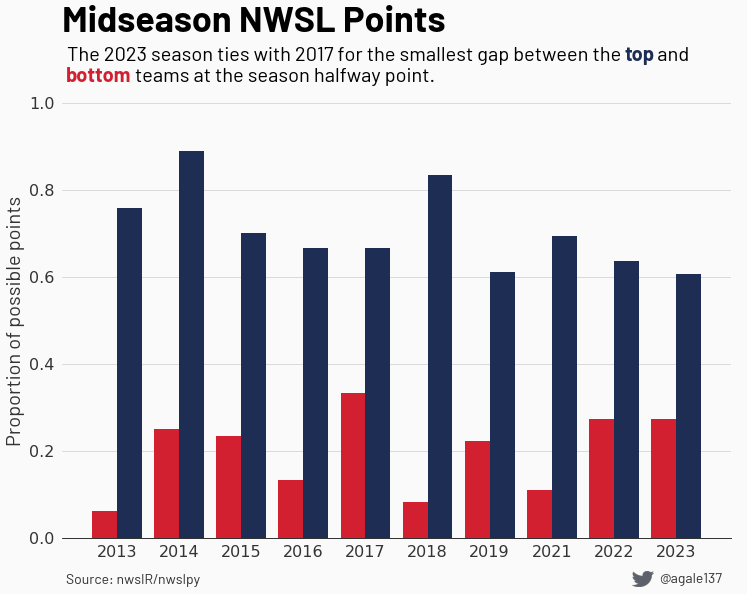

In [97]:
plt.clf()
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(dpi=200, facecolor=Colors.WHITE)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

best = "#1d2d53"
worst = "#d22030"

plt.bar(results.index - 0.2, results["worst"], 0.4, color=worst)
plt.bar(results.index + 0.2, results["best"], 0.4, color = best)

# Axes and ticks
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.tick_params(axis="both", which="major", labelsize=16, labelcolor=Colors.BLACK)
ax.tick_params(bottom=False, left=False)
ax.set_ylim([0, 1])
ax.set_xticks(results.index)
ax.set_xticklabels(results["season"])
ax.set_ylabel("Proportion of possible points", fontproperties=Fonts.BARLOW,
    size=20, color=Colors.BLACK)

# Title
ax.set_title(
    "Midseason NWSL Points",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
    x=0,
    y=1.15,
)

# Subtitle
ax.text(
    -0.8,
    1.05,
    "The 2023 season ties with 2017 for the smallest gap between the         and\n                 teams at the season halfway point.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

plt.figtext(
    0.776,
    0.954,
    "top",
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=20,
    color=best,
)

plt.figtext(
    0.13,
    0.917,
    "bottom",
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=20,
    color=worst,
)

# Twitter logo and username
add_twitter_handle(fig, x=0.78, y=0.04, fs=14, w=0.03)
add_source(fig, "nwslR/nwslpy", x=0.13, y=0.04, fs=14)

# Save image
plt.savefig(
    "best_worst_halfway.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)